In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, SpatialDropout1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
output_dir = 'model_output/dense'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_dense = 256
dropout = 0.2

n_conv = 256
k_conv = 3

In [9]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

In [10]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [11]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 400, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"weights.{epoch:02d}.hdf5")

In [15]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [16]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 23s 115ms/step - loss: 0.4939 - accuracy: 0.7374 - val_loss: 0.3007 - val_accuracy: 0.8740
Epoch 2/4
196/196 [==============================] - 23s 117ms/step - loss: 0.2511 - accuracy: 0.8976 - val_loss: 0.2697 - val_accuracy: 0.8868
Epoch 3/4
196/196 [==============================] - 23s 117ms/step - loss: 0.1720 - accuracy: 0.9354 - val_loss: 0.2738 - val_accuracy: 0.8882
Epoch 4/4
196/196 [==============================] - 23s 119ms/step - loss: 0.1187 - accuracy: 0.9584 - val_loss: 0.4058 - val_accuracy: 0.8560


In [17]:
model.load_weights('model_output/denseweights.03.hdf5')

In [18]:
y_hat = model.predict(x_valid)

In [19]:
y_hat[0]

array([0.00640765], dtype=float32)

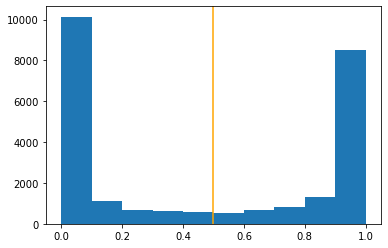

In [20]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [21]:
pct_auc = roc_auc_score(y_valid, y_hat) * 100.0

In [22]:
"{:0.2f}".format(pct_auc)

'95.92'